In [1]:
%reset -f
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Logistic Regression:
Use the dataset here: https://archive.ics.uci.edu/ml/datasets/Haberman's%2BSurvival 
Perform a logistic regression to determine a model of survival


In [2]:
Haberman=pd.read_csv("haberman.data",sep=',',header=None) 
Haberman.columns=(['age','year','postive','survive'])
display(Haberman)

,age,year,postive,survive
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


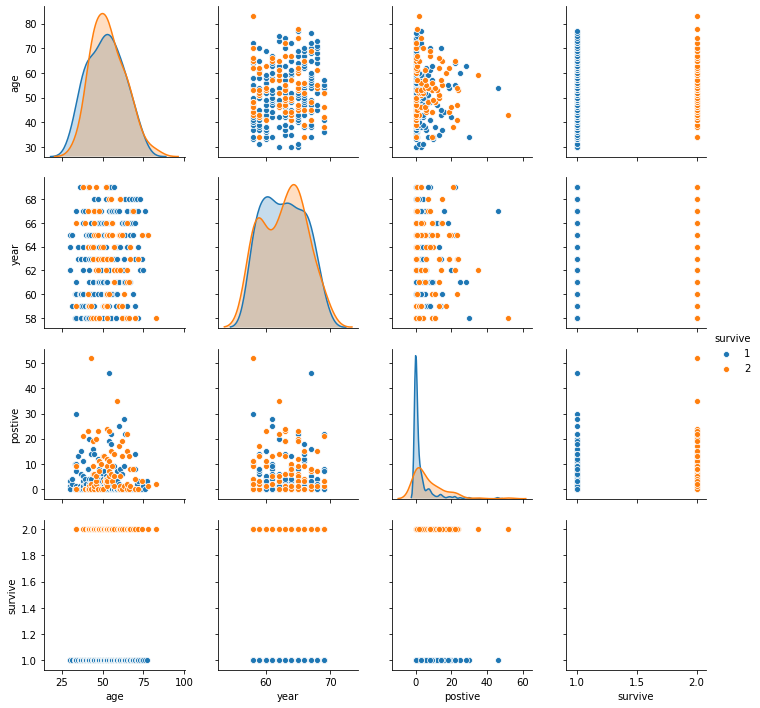

In [3]:
sns.pairplot(data=Haberman,hue="survive")

In [4]:
y = Haberman.survive
x = Haberman.drop('survive',axis = 1)

In [5]:
log_reg = LogisticRegression(solver='lbfgs')
fit = log_reg.fit(x,y)
y_pred=log_reg.predict(x)


### confiusion matrix

In [6]:
Harberman = Haberman.assign(y_pred=y_pred)

display(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

display(f"{fit.coef_},{fit.intercept_}")

incorrect = Harberman[y_pred != y]
display(incorrect)

array([[215,  10],
       [ 67,  14]])

              precision    recall  f1-score   support

           1       0.76      0.96      0.85       225
           2       0.58      0.17      0.27        81

    accuracy                           0.75       306
   macro avg       0.67      0.56      0.56       306
weighted avg       0.72      0.75      0.69       306



'[[ 0.01988257 -0.00975411  0.08838822]],[-1.86233569]'

,age,year,postive,survive,y_pred
7,34,59,0,2,1
8,34,66,9,2,1
9,34,58,30,1,2
34,39,66,0,2,1
44,41,64,0,2,1
...,...,...,...,...,...
287,70,66,14,1,2
293,72,63,0,2,1
299,74,65,3,2,1
304,78,65,1,2,1
